# Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read image

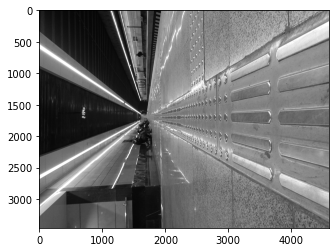

In [20]:
RGB = mpimg.imread("20230121_215432.jpg")
# convert from RBG to gray
image = cv2.cvtColor(RGB, cv2.COLOR_RGB2GRAY)
plt.imshow(image,cmap= "gray")

# Canny edge detection

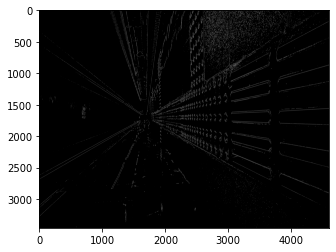

In [21]:
low_thresh= 200
high_thresh= 220
edges = cv2.Canny(image, low_thresh, high_thresh)
plt.imshow(edges,cmap="gray")

# Hough Transform

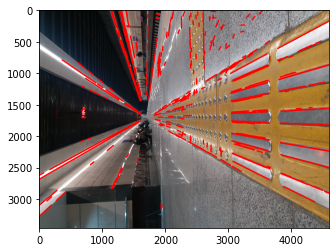

In [44]:
# Hyperparameters
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 50
max_line_gap = 10

lines = cv2.HoughLinesP(edges,rho , theta, threshold,None, min_line_length, max_line_gap)

cp_img = np.copy(RGB)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(cp_img, (x1,y1), (x2,y2), (255, 0, 0), 20)
plt.imshow(cp_img,cmap="gray")



# Hough circles

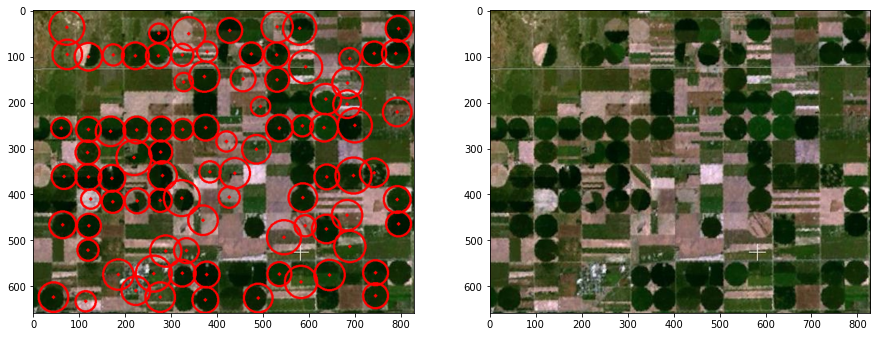

In [56]:
#################### reading image #################
rgb = mpimg.imread("round_farms.jpg")
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
rgb_c = np.copy(rgb)
###################   low pass filter ###########
blur = cv2.GaussianBlur(gray, (3,3), 0)
# plt.imshow(blur,cmap= "gray")

################## Hough circle ###################
minDist=45
param1=70
param2=18
minRadius=20
maxRadius=40
# * minDist - the minimum distance between circles
# * param1 - the higher value for performing Canny edge detection
# * param2 - threshold for circle detection, a smaller value --> more circles will be detected
# * min/max radius for detected circles
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1
                        , minDist = minDist
                        , param1= param1
                        , param2= param2
                        , minRadius = minRadius
                        , maxRadius = maxRadius)
#get expect type
circles = np.uint16(np.reshape(circles ,(-1,3)))

for circle in circles:
    cv2.circle(rgb_c, (circle[0], circle[1]),circle[2], (255,0,0), 3)
    cv2.circle(rgb_c, (circle[0], circle[1]) , 2, (255,0,0), 3)

plt.subplots(1,2, figsize = (15,10))
plt.subplot(1,2,1)
plt.imshow(rgb_c)

plt.subplot(1,2,2)
plt.imshow(rgb)



In [36]:
circles.shape

(99, 3)

In [34]:
np.reshape(circles ,(-1,3)).shape

(99, 3)